In [1]:
import pandas as pd
from datetime import date,timedelta

In [2]:
url="http://opendata.ecdc.europa.eu/covid19/casedistribution/csv/"
df2=pd.read_csv(url, parse_dates=["dateRep"], dayfirst=True)

In [3]:
df=df2[(df2.dateRep<pd.Timestamp(date.today()- timedelta(days = 1))) & (df2.dateRep>pd.Timestamp('2020-02-15'))].sort_values(by=["dateRep"], ascending=True)

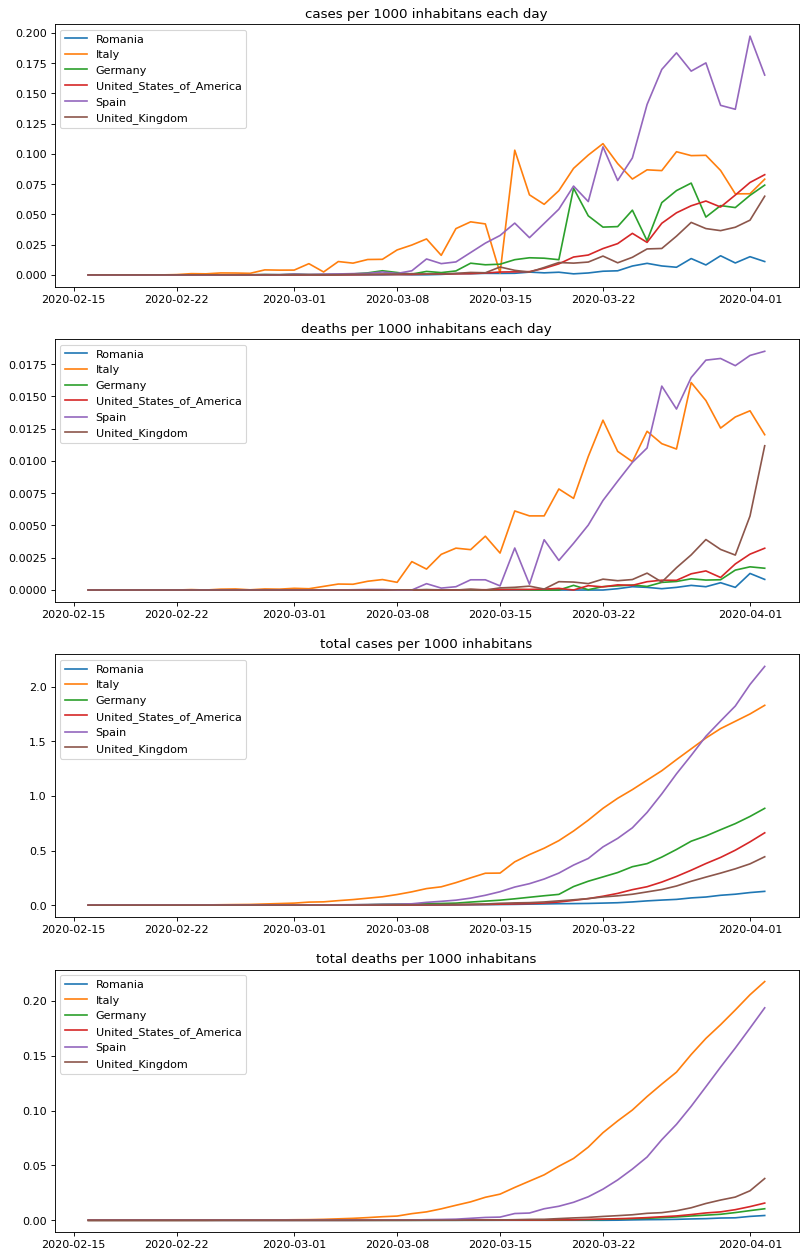

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax= plt.subplots(4, figsize=(12, 20), dpi=80, facecolor='w', edgecolor='k')

countries= ["Romania","Italy","Germany","United_States_of_America","Spain","United_Kingdom"]

for country in countries:
    c=df[df.countriesAndTerritories==country].copy()
    c["total_cases"]=c.cases.cumsum()
    c["total_deaths"]=c.deaths.cumsum()

    ax[0].plot(c.dateRep, c.cases/c.popData2018*1000)
    ax[1].plot(c.dateRep, c.deaths/c.popData2018*1000)
    ax[2].plot(c.dateRep, c.total_cases/c.popData2018*1000)
    ax[3].plot(c.dateRep, c.total_deaths/c.popData2018*1000)

 #   ax[2].plot(c.dateRep, c.total_cases)
 #   ax[3].plot(c.dateRep, c.total_deaths)


ax[0].set_title("cases per 1000 inhabitans each day")
ax[1].set_title("deaths per 1000 inhabitans each day")
ax[2].set_title("total cases per 1000 inhabitans")
ax[3].set_title("total deaths per 1000 inhabitans")

#ax[2].set_yscale("log")
#ax[3].set_yscale("log")

for i in range(0,4):
    ax[i].legend(countries)

fig.savefig("cases_per_1000_inhabitans.png")

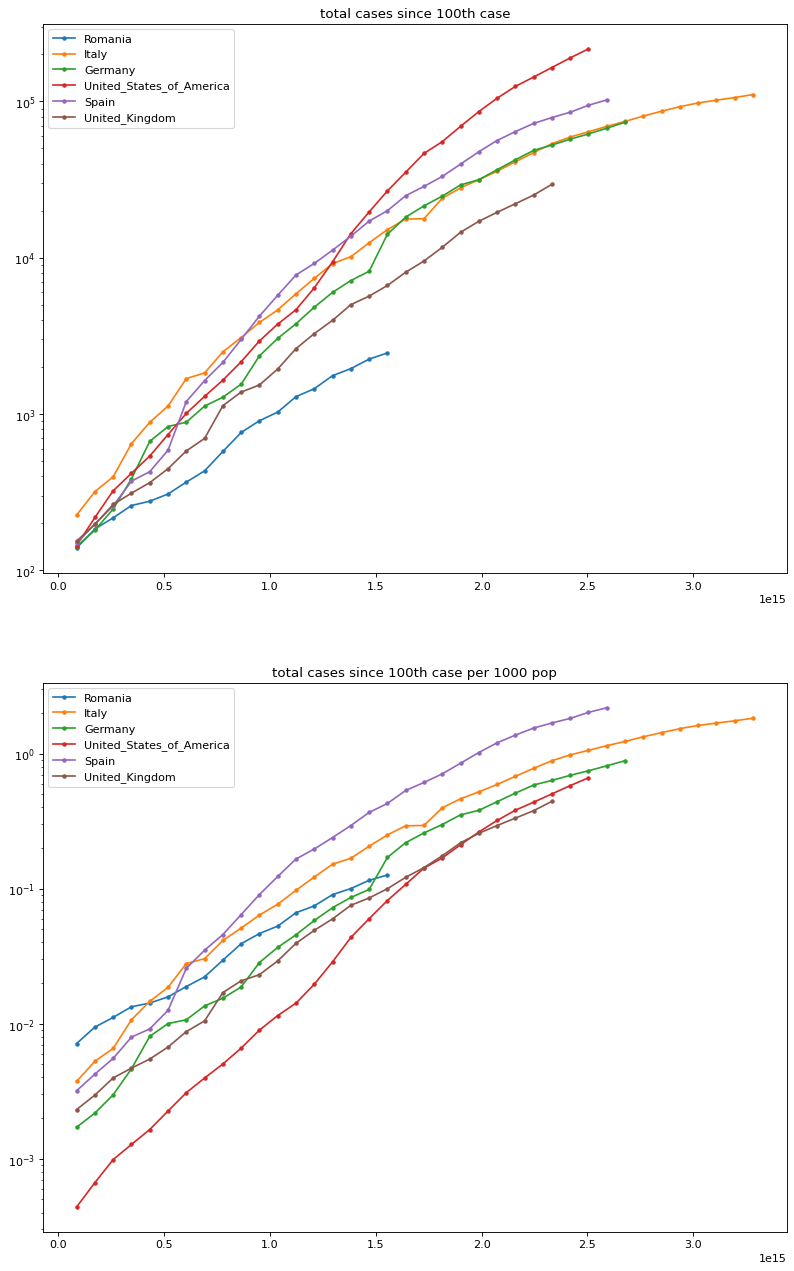

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax= plt.subplots(2, figsize=(12, 20), dpi=80, facecolor='w', edgecolor='k')

countries= ["Romania","Italy","Germany","United_States_of_America","Spain","United_Kingdom"]

for country in countries:
    c=df[df.countriesAndTerritories==country].copy()
    c["total_cases"]=c.cases.cumsum()
    c["total_deaths"]=c.deaths.cumsum()
    dayWith100thcase=c[c.index==c[c['total_cases'].gt(100)].index[0]].dateRep
    c["days_since_100thcase"]=c.apply(lambda r: (r["dateRep"]-dayWith100thcase), axis=1)
    c2=c[c.days_since_100thcase > timedelta(0)]
    
    ax[0].plot(c2.days_since_100thcase, c2.total_cases, marker='.')
    ax[1].plot(c2.days_since_100thcase, c2.total_cases/c2.popData2018*1000, marker='.')

 #   ax[2].plot(c.dateRep, c.total_cases)
 #   ax[3].plot(c.dateRep, c.total_deaths)


ax[0].set_title("total cases since 100th case")
ax[0].set_yscale("log")

ax[1].set_title("total cases since 100th case per 1000 pop")
ax[1].set_yscale("log")


#ax[3].set_yscale("log")


ax[0].legend(countries)
ax[1].legend(countries)

fig.savefig("total_cases_since_100thcase.png")